In [1]:
%load_ext autoreload
%autoreload 2
# Enable imports form top-level of project (edit top_level_path accordingly)
import os
import sys
top_level_path = os.path.abspath(os.path.join('..'))
if top_level_path not in sys.path:
	sys.path.append(top_level_path)

In [20]:
from benchmarking import Benchmark, new_random_benchmark, RandomParams
from longestpath.solvers import Solver
import numpy as np

params_code = "[RandomParams(directed=True, num_vertices=50, average_degree=a) for a in np.arange(0.1, 4, 0.1) for _ in range(10)]"
params_list = eval(params_code)
solvers = [Solver("brute", "BRANCH_N_BOUND")]
benchmark_path = "../benchmarks/average_length_n50"

new_random_benchmark(params_list=params_list, params_code=params_code, solvers=solvers, override_benchmark_path=benchmark_path)

In [21]:
benchmark = Benchmark.load(benchmark_path)

benchmark.run()

graph: 0.txt, solver: brute('BRANCH_N_BOUND') ... ✅
length: 1, run_time: 3e-06
graph: 1.txt, solver: brute('BRANCH_N_BOUND') ... ✅
length: 1, run_time: 3e-06
graph: 2.txt, solver: brute('BRANCH_N_BOUND') ... ✅
length: 1, run_time: 3e-06
graph: 3.txt, solver: brute('BRANCH_N_BOUND') ... ✅
length: 1, run_time: 8e-06
graph: 4.txt, solver: brute('BRANCH_N_BOUND') ... ✅
length: 1, run_time: 3e-06
graph: 5.txt, solver: brute('BRANCH_N_BOUND') ... ✅
length: 1, run_time: 5e-06
graph: 6.txt, solver: brute('BRANCH_N_BOUND') ... ✅
length: 2, run_time: 3e-06
graph: 7.txt, solver: brute('BRANCH_N_BOUND') ... ✅
length: 1, run_time: 6e-06
graph: 8.txt, solver: brute('BRANCH_N_BOUND') ... ✅
length: 2, run_time: 3e-06
graph: 9.txt, solver: brute('BRANCH_N_BOUND') ... ✅
length: 1, run_time: 3e-06
graph: 10.txt, solver: brute('BRANCH_N_BOUND') ... ✅
length: 2, run_time: 4e-06
graph: 11.txt, solver: brute('BRANCH_N_BOUND') ... ✅
length: 2, run_time: 3e-06
graph: 12.txt, solver: brute('BRANCH_N_BOUND') ...

SystemExit: 130

/opt/homebrew/Caskroom/miniconda/base/envs/tno-env/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3558: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


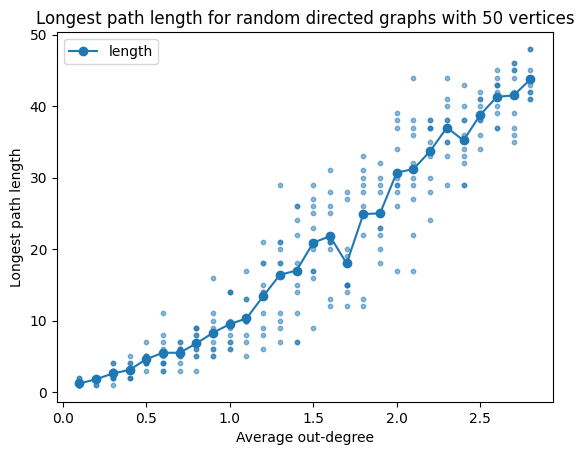

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

benchmark = Benchmark.load(benchmark_path)

results = benchmark.results()
solver_names = [str(solver) for solver in benchmark.solvers]
graph_infos = benchmark.info["graph_infos"]

df = pd.DataFrame(results)
df["solver_name"] = df["solver"].apply(lambda i: solver_names[i])
df["average_degree"] = df["graph_id"].apply(lambda id: graph_infos[id]['average_degree'])

view = df[['average_degree', 'solver_name','length', 'run_time']]

df.groupby(['average_degree']).agg({'length': 'mean'}).reset_index() \
    .plot(x='average_degree', y='length', style="o-")

for solver_name in solver_names:
    plt.scatter(df['average_degree'], df['length'], alpha=0.5, s=10)



# plt.xticks(np.arange(1, 8.5, 0.5))
plt.ylabel("Longest path length")
plt.xlabel("Average out-degree")
plt.title("Longest path length for random directed graphs with 50 vertices")
# plt.axhline(y=20, color='black', linestyle='--', label='run-time cutoff', linewidth=1, alpha=0.5, zorder=0)
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# df[df["solver"] == 0].plot(x = "average_degree", y="run_time", style="--bo", label="solver_name")
# df[df["solver"] == 1].plot(x = "average_degree", y="run_time", style="--bo", label="solver_name")

# plt.gcf().set_size_inches(8, 6)
plt.savefig(os.path.join(benchmark.benchmark_path, "plot.png"), dpi=400, bbox_inches='tight')